<a href="https://colab.research.google.com/github/BeninGitHub/RussiaUkrainWAR/blob/main/Russia_Ukraine_Conflict_Twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libaries

In [223]:
!pip install -U kaleido


In [224]:
!pip install plotly

In [225]:
!pip install requests pandas plotly chart-studio python-dotenv

In [226]:
!pip install pycountry-convert

In [227]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.plotting import figure
from bokeh.io import output_file, show, output_notebook
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter
import nltk
from nltk.corpus import stopwords
import spacy
import re
from spacy.util import compounding
from spacy.util import minibatch
from spacy import displacy
import gc
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import os
from textblob import TextBlob
import urllib
%matplotlib inline 
%pylab inline 
import pytz
import pycountry
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import words
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning:

pylab import has clobbered these variables: ['random', 'figure', 'show', 'load']
`%matplotlib` prevents importing * from pylab and numpy



In [228]:
import chart_studio.tools as cst # For exporting to Chart studio
import chart_studio.plotly as py # for exporting Plotly visualizations to Chart Studio

In [229]:
import tweepy # for tweet mining
import csv # to read and write csv files
import re # In-built regular expressions library
import string # Inbuilt string library
import glob # to retrieve files/pathnames matching a specified pattern. 
import random # generating random numbers
import requests # to send HTTP requests
from PIL import Image # for opening, manipulating, and saving many different image file f
import matplotlib.pyplot as plt # for plotting

# Set the limits for Pandas Dataframe display to avoid potential system freeze
pd.set_option("display.max_rows", 15)
pd.set_option("display.max_columns", 15)
pd.set_option('display.max_colwidth', 40)

# Natural Language Processing Toolkit
from nltk.corpus import stopwords, words # get stopwords from NLTK library & get all words in english language
from nltk.tokenize import word_tokenize # to create word tokens
# from nltk.stem import PorterStemmer (I played around with Stemmer and decided to use Lemmatizer instead)
from nltk.stem import WordNetLemmatizer # to reduce words to orginal form
from nltk import pos_tag # For Parts of Speech tagging

from textblob import TextBlob # TextBlob - Python library for processing textual data

import plotly.express as px # To make express plots in Plotly

#import chart_studio.tools as cst # For exporting to Chart studio
#import chart_studio.plotly as py # for exporting Plotly visualizations to Chart Studio

import plotly.offline as pyo # Set notebook mode to work in offline
pyo.init_notebook_mode()
import plotly.io as pio # Plotly renderer
import plotly.graph_objects as go # For plotting plotly graph objects
from plotly.subplots import make_subplots #to make more than one plot in Plotly


# WordCloud - Python linrary for creating image wordclouds
from wordcloud import WordCloud

#from emot.emo_unicode import UNICODE_EMO, EMOTICONS # For emojis

In [230]:
import csv

data = pd.read_csv("data7.csv", encoding='latin1')
data.head(10)

ï»¿        userid         username  \
0    0  1.688277e+07          Yaniela   
1    1  3.205296e+09         gregffff   
2    2  1.235940e+18  ThanapornThon17   
3    3  1.347990e+18   I_Protest_2021   
4    4  1.505390e+18     Marsh_Win_01   
5    5  7.996530e+17   Judson_Bennett   
6    6  1.280650e+18       SElsworth4   
7    7  1.767364e+07         livemint   
8    8  4.667140e+07           ProSyn   
9    9  1.275480e+18       medyanews_   

                                  acctdesc                  location  \
0  Animal lover, supports those who fig...                    Hawaii   
1                                      NaN                       NaN   
2  ×Â¹â¬×Â¸Â¥×Â¹Ë×Â¸â¢×Â¹â×Â...                       NaN   
3  01000001 01101110 01101111 01101110 ...    International Web Zone   
4  × ÂÂÂ¿@Pickaw @TWITTERPICKER × ÂÂ...            Hunter Account   
5  Coastal Network founder. Advocate, j...                       NaN   
6  Anyone can do the right thing. You c...  Southernmost Southern CA   
7  Breaking news and analyses of Indian...                     India   
8  The World×â¬â¢s Opinion Page, fea...                       NaN   
9  Medya News offers news, stories, col...      Kurdistan, Worldwide   

   following  followers  ...  retweetcount  \
0       1158        392  ...          3412   
1        122        881  ...           100   
2        231         72  ...             9   
3        399        377  ...           573   
4        158         25  ...           190   
5        766       2024  ...             1   
6       1343        549  ...             5   
7         70    2033266  ...             2   
8       2042     221952  ...             3   
9        167       6102  ...             0   

                                      text  \
0  ×ÂÂ¡The Ukrainian Air Force would ...   
1  Chernihiv oblast. Ukrainians welcome...   
2  America × Ââ¡Ã·× Ââ¡Â¸ is prepar...   
3  JUST IN: #Anonymous has hacked &amp;...   
4  ***PUBLIC MINT NOW LIVE***\n\nFor \n...   
5  The Amazing story of Former Sussex C...   
6  &amp;quot;How we were waiting for yo...   
7  India's purchase of discounted #Russ...   
8  The most basic tenet of what stabili...   
9  "The image that Russia acquired over...   

                                  hashtags language  coordinates  \
0                                       []       en          NaN   
1  [{'text': 'russianinvasion', 'indice...       en          NaN   
2  [{'text': 'RussianUkrainianWar', 'in...       en          NaN   
3  [{'text': 'Anonymous', 'indices': [2...       en          NaN   
4                                       []       en          NaN   
5  [{'text': 'Russia', 'indices': [208,...       en          NaN   
6                                       []       en          NaN   
7  [{'text': 'Russian', 'indices': [31,...       en          NaN   
8  [{'text': 'Ukraine', 'indices': [209...       en          NaN   
9  [{'text': 'Putin', 'indices': [69, 7...       en          NaN   

  favorite_count extractedts  
0              0     44:20.1  
1              0     09:37.1  
2              0     09:37.1  
3              0     31:39.7  
4              0     09:37.1  
5              0     14:21.5  
6              0     31:39.7  
7              7     44:20.1  
8              4     14:21.5  
9              0     44:20.1  

[10 rows x 18 columns]

In [231]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [232]:
data.language.value_counts()

en     379713
es      36140
und     20365
fr       9332
de       7845
        ...  
si          8
ps          3
ckb         2
dv          2
km          1
Name: language, Length: 61, dtype: int64

In [233]:
def reorder_locations(location):
  try:
    location = re.sub("United States","USA",location)
    location = re.sub("us","USA",location)
    location = re.sub("[^\x00-\x7F]+", "somewhere unknown",location)
    location = re.sub("NaN", "somewhere unknown",location)
    return location
  except:
    return location

  return location

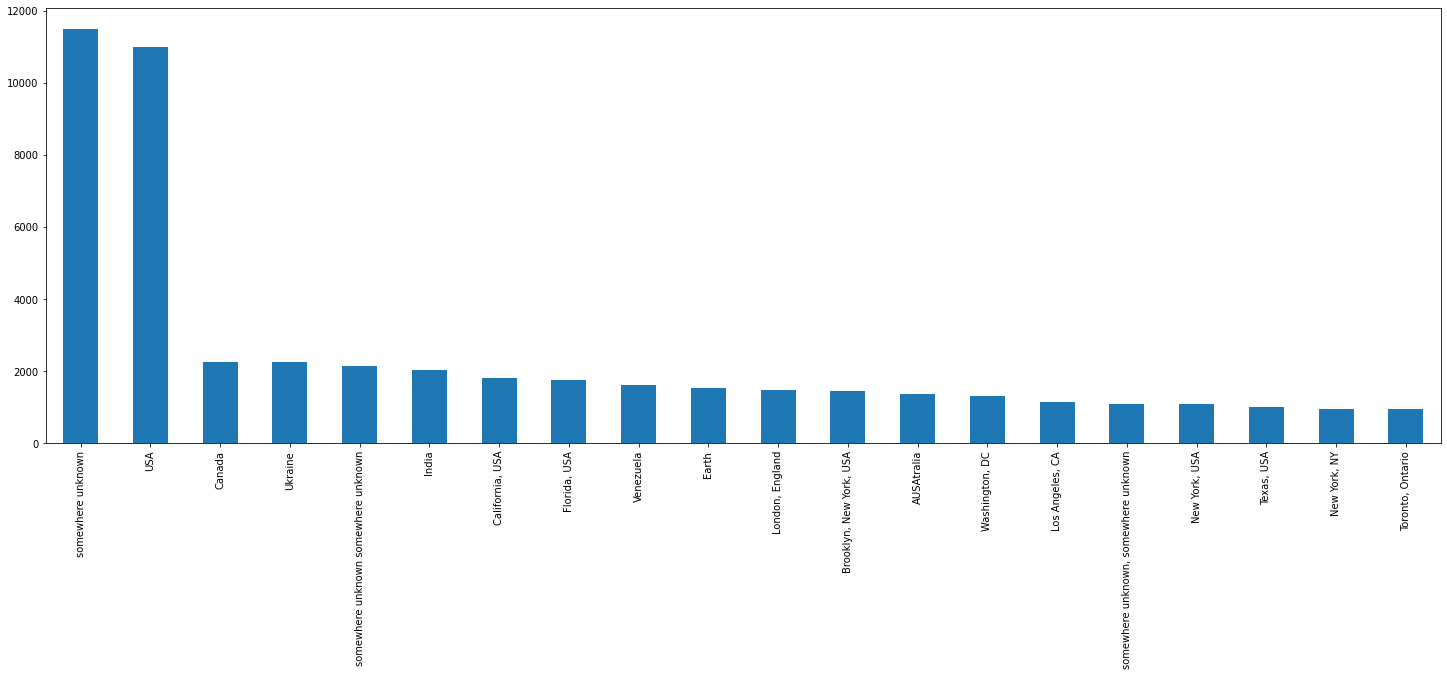

In [234]:
data['location'] = data['location'].apply(lambda x: reorder_locations(x))

data.location.value_counts()[:20].plot.bar()
plt.gcf().set_size_inches(25, 8)


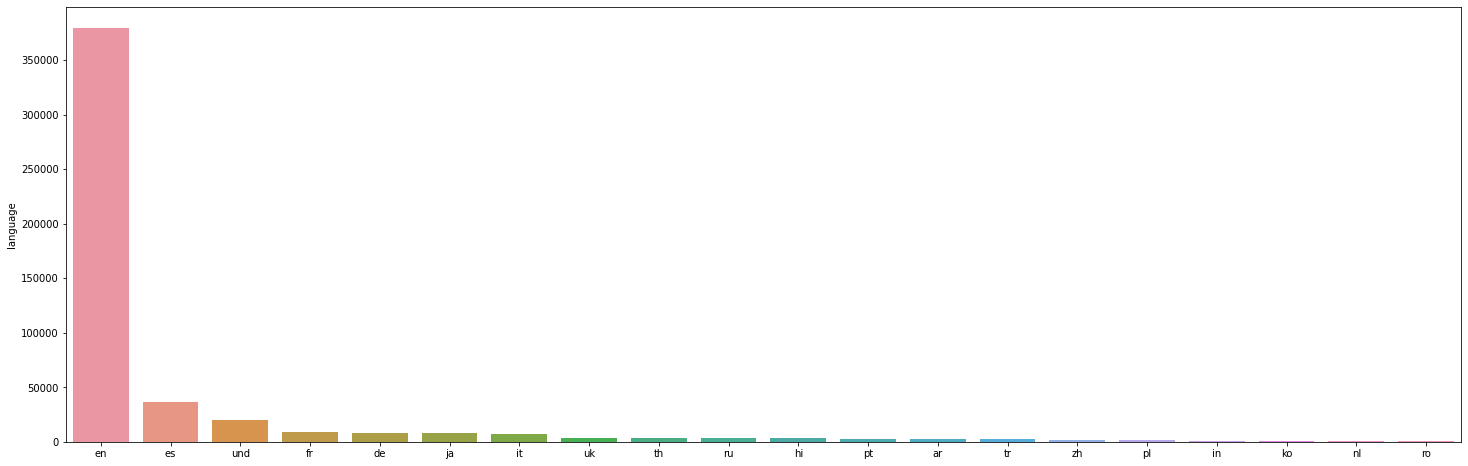

In [235]:
sns.barplot(x= data.language.value_counts()[:20].index,y=data.language.value_counts()[:20])
plt.gcf().set_size_inches(25, 8)

In [236]:
df_en = data[data.language == 'en'].drop('language', axis=1)
df_en.head(5)

ï»¿        userid         username  \
0    0  1.688277e+07          Yaniela   
1    1  3.205296e+09         gregffff   
2    2  1.235940e+18  ThanapornThon17   
3    3  1.347990e+18   I_Protest_2021   
4    4  1.505390e+18     Marsh_Win_01   

                                  acctdesc                location  following  \
0  Animal lover, supports those who fig...                  Hawaii       1158   
1                                      NaN                     NaN        122   
2  ×Â¹â¬×Â¸Â¥×Â¹Ë×Â¸â¢×Â¹â×Â...                     NaN        231   
3  01000001 01101110 01101111 01101110 ...  International Web Zone        399   
4  × ÂÂÂ¿@Pickaw @TWITTERPICKER × ÂÂ...          Hunter Account        158   

   followers  ...  tweetcreatedts retweetcount  \
0        392  ...      01/04/2022         3412   
1        881  ...      01/04/2022          100   
2         72  ...      01/04/2022            9   
3        377  ...      01/04/2022          573   
4         25  ...      01/04/2022          190   

                                      text  \
0  ×ÂÂ¡The Ukrainian Air Force would ...   
1  Chernihiv oblast. Ukrainians welcome...   
2  America × Ââ¡Ã·× Ââ¡Â¸ is prepar...   
3  JUST IN: #Anonymous has hacked &amp;...   
4  ***PUBLIC MINT NOW LIVE***\n\nFor \n...   

                                  hashtags  coordinates favorite_count  \
0                                       []          NaN              0   
1  [{'text': 'russianinvasion', 'indice...          NaN              0   
2  [{'text': 'RussianUkrainianWar', 'in...          NaN              0   
3  [{'text': 'Anonymous', 'indices': [2...          NaN              0   
4                                       []          NaN              0   

  extractedts  
0     44:20.1  
1     09:37.1  
2     09:37.1  
3     31:39.7  
4     09:37.1  

[5 rows x 17 columns]

In [237]:
sorted_tweets = df_en.sort_values(by = 'retweetcount', ascending=False)
sorted_tweets

ï»¿        userid         username  \
207243   7239  2.554873e+09         bts_sone   
207254   7250  3.910485e+09        myyreneee   
207348   7344  1.369140e+18       5trawbemii   
207341   7337  1.414060e+18        rdcampos_   
207615   7611  2.511578e+09          ktyxxxb   
...       ...           ...              ...   
33535   33535  2.724200e+09  LilostartupLilo   
232994  32990  1.486370e+18          swepal2   
33536   33536  1.298710e+18       BeyFirudin   
232984  32980  1.202953e+09        lifieldgg   
363737  13730  1.097102e+09     polefrancois   

                                       acctdesc           location  following  \
207243                             SONE A.R.M.Y     In BTS's heart        608   
207254  You can do all things through Christ...    California, USA        231   
207348  × ÂâÂ× Âââ¢× ÂâÂ× Âââ...                NaN         83   
207341  BTS × ÂâÂ× ÂâÂ× ÂâÂ× Ââ...                NaN       1121   
207615  × Ââ¢Â¸ × Ââ¢Â¿× ÂÂâ× ÂÂÂ...                NaN        148   
...                                         ...                ...        ...   
33535   Selbst ernannter Goldfisch in Platon...             Berlin        989   
232994  Silence is Worse than Crimes against...  Stockholm, Sweden       2212   
33536   God created Turks, then paused, then...                NaN        331   
232984  #FightForUkraine #StandWithUkraine #...         Texas, USA       4849   
363737  Journalist |\nFiction Writer |\nScre...                NaN        131   

        followers  ...  tweetcreatedts retweetcount  \
207243         73  ...      05/04/2022       436782   
207254         64  ...      05/04/2022       436782   
207348         54  ...      05/04/2022       436781   
207341        565  ...      05/04/2022       436781   
207615        162  ...      05/04/2022       436778   
...           ...  ...             ...          ...   
33535         396  ...      01/04/2022            0   
232994        243  ...      05/04/2022            0   
33536         193  ...      01/04/2022            0   
232984       2334  ...      05/04/2022            0   
363737         63  ...      08/04/2022            0   

                                           text  \
207243  [#×Ëâª×ÂË×ÂË×Â°Â©×Æâ] ...   
207254  [#×Ëâª×ÂË×ÂË×Â°Â©×Æâ] ...   
207348  [#×Ëâª×ÂË×ÂË×Â°Â©×Æâ] ...   
207341  [#×Ëâª×ÂË×ÂË×Â°Â©×Æâ] ...   
207615  [#×Ëâª×ÂË×ÂË×Â°Â©×Æâ] ...   
...                                         ...   
33535   Are you still selling your products ...   
232994  @mabosisc @Michael__Baskin @DrewG777...   
33536   @disclosetv Burns' #Russian buddies ...   
232984  Mariupol is "on the brink of a human...   
363737  @KyivIndependent Just waiting for tr...   

                                       hashtags  coordinates favorite_count  \
207243  [{'text': '×Ëâª×ÂË×ÂË×Â°Â©...          NaN              0   
207254  [{'text': '×Ëâª×ÂË×ÂË×Â°Â©...          NaN              0   
207348  [{'text': '×Ëâª×ÂË×ÂË×Â°Â©...          NaN              0   
207341  [{'text': '×Ëâª×ÂË×ÂË×Â°Â©...          NaN              0   
207615  [{'text': '×Ëâª×ÂË×ÂË×Â°Â©...          NaN              0   
...                                         ...          ...            ...   
33535   [{'text': 'Russia', 'indices': [39, ...          NaN              0   
232994  [{'text': 'RomanAbramovich', 'indice...          NaN              0   
33536   [{'text': 'Russian', 'indices': [19,...          NaN              0   
232984  [{'text': 'FightforUkraine', 'indice...          NaN              0   
363737  [{'text': 'NATO', 'indices': [42, 47]}]          NaN              1   

       extractedts  
207243     25:00.6  
207254     25:00.5  
207348     24:58.9  
207341     24:59.1  
207615     24:54.8  
...            ...  
33535      29:40.1  
232994     26:27.2  
33536      40:06.3  
232984     26:27.3  
363737

In [238]:
sorted_tweets['text'] = sorted_tweets['text'].str.lower()

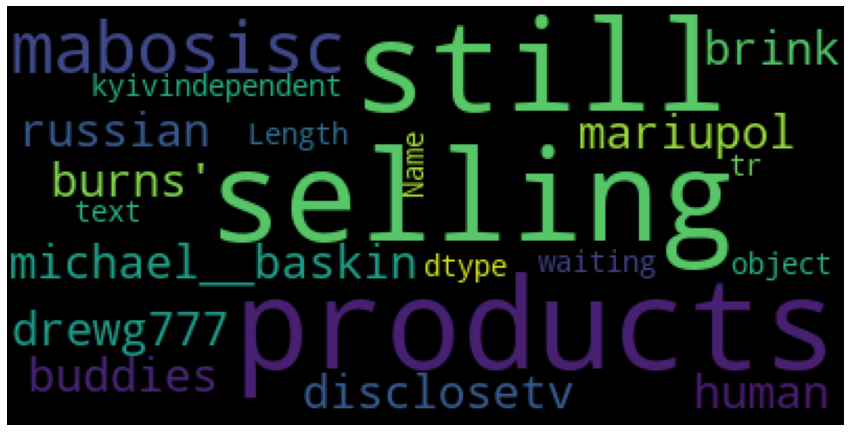

In [239]:
stopwords_set = set(STOPWORDS)
wordcloud = WordCloud(background_color='black',
                     stopwords = stopwords_set,
                      max_words = 300,
                      max_font_size = 60,
                      random_state=42,
                     ).generate(str(sorted_tweets['text']))

print(wordcloud)
plt.imshow(wordcloud)
plt.axis('off')
plt.gcf().set_size_inches(15, 8)
plt.show()


In [240]:
sorted_tweets

ï»¿        userid         username  \
207243   7239  2.554873e+09         bts_sone   
207254   7250  3.910485e+09        myyreneee   
207348   7344  1.369140e+18       5trawbemii   
207341   7337  1.414060e+18        rdcampos_   
207615   7611  2.511578e+09          ktyxxxb   
...       ...           ...              ...   
33535   33535  2.724200e+09  LilostartupLilo   
232994  32990  1.486370e+18          swepal2   
33536   33536  1.298710e+18       BeyFirudin   
232984  32980  1.202953e+09        lifieldgg   
363737  13730  1.097102e+09     polefrancois   

                                       acctdesc           location  following  \
207243                             SONE A.R.M.Y     In BTS's heart        608   
207254  You can do all things through Christ...    California, USA        231   
207348  × ÂâÂ× Âââ¢× ÂâÂ× Âââ...                NaN         83   
207341  BTS × ÂâÂ× ÂâÂ× ÂâÂ× Ââ...                NaN       1121   
207615  × Ââ¢Â¸ × Ââ¢Â¿× ÂÂâ× ÂÂÂ...                NaN        148   
...                                         ...                ...        ...   
33535   Selbst ernannter Goldfisch in Platon...             Berlin        989   
232994  Silence is Worse than Crimes against...  Stockholm, Sweden       2212   
33536   God created Turks, then paused, then...                NaN        331   
232984  #FightForUkraine #StandWithUkraine #...         Texas, USA       4849   
363737  Journalist |\nFiction Writer |\nScre...                NaN        131   

        followers  ...  tweetcreatedts retweetcount  \
207243         73  ...      05/04/2022       436782   
207254         64  ...      05/04/2022       436782   
207348         54  ...      05/04/2022       436781   
207341        565  ...      05/04/2022       436781   
207615        162  ...      05/04/2022       436778   
...           ...  ...             ...          ...   
33535         396  ...      01/04/2022            0   
232994        243  ...      05/04/2022            0   
33536         193  ...      01/04/2022            0   
232984       2334  ...      05/04/2022            0   
363737         63  ...      08/04/2022            0   

                                           text  \
207243  [#×ëâª×âë×âë×â°â©×æâ] ...   
207254  [#×ëâª×âë×âë×â°â©×æâ] ...   
207348  [#×ëâª×âë×âë×â°â©×æâ] ...   
207341  [#×ëâª×âë×âë×â°â©×æâ] ...   
207615  [#×ëâª×âë×âë×â°â©×æâ] ...   
...                                         ...   
33535   are you still selling your products ...   
232994  @mabosisc @michael__baskin @drewg777...   
33536   @disclosetv burns' #russian buddies ...   
232984  mariupol is "on the brink of a human...   
363737  @kyivindependent just waiting for tr...   

                                       hashtags  coordinates favorite_count  \
207243  [{'text': '×Ëâª×ÂË×ÂË×Â°Â©...          NaN              0   
207254  [{'text': '×Ëâª×ÂË×ÂË×Â°Â©...          NaN              0   
207348  [{'text': '×Ëâª×ÂË×ÂË×Â°Â©...          NaN              0   
207341  [{'text': '×Ëâª×ÂË×ÂË×Â°Â©...          NaN              0   
207615  [{'text': '×Ëâª×ÂË×ÂË×Â°Â©...          NaN              0   
...                                         ...          ...            ...   
33535   [{'text': 'Russia', 'indices': [39, ...          NaN              0   
232994  [{'text': 'RomanAbramovich', 'indice...          NaN              0   
33536   [{'text': 'Russian', 'indices': [19,...          NaN              0   
232984  [{'text': 'FightforUkraine', 'indice...          NaN              0   
363737  [{'text': 'NATO', 'indices': [42, 47]}]          NaN              1   

       extractedts  
207243     25:00.6  
207254     25:00.5  
207348     24:58.9  
207341     24:59.1  
207615     24:54.8  
...            ...  
33535      29:40.1  
232994     26:27.2  
33536      40:06.3  
232984     26:27.3  
363737

In [241]:
sorted_tweets.head()

ï»¿        userid    username  \
207243  7239  2.554873e+09    bts_sone   
207254  7250  3.910485e+09   myyreneee   
207348  7344  1.369140e+18  5trawbemii   
207341  7337  1.414060e+18   rdcampos_   
207615  7611  2.511578e+09     ktyxxxb   

                                       acctdesc         location  following  \
207243                             SONE A.R.M.Y   In BTS's heart        608   
207254  You can do all things through Christ...  California, USA        231   
207348  × ÂâÂ× Âââ¢× ÂâÂ× Âââ...              NaN         83   
207341  BTS × ÂâÂ× ÂâÂ× ÂâÂ× Ââ...              NaN       1121   
207615  × Ââ¢Â¸ × Ââ¢Â¿× ÂÂâ× ÂÂÂ...              NaN        148   

        followers  ...  tweetcreatedts retweetcount  \
207243         73  ...      05/04/2022       436782   
207254         64  ...      05/04/2022       436782   
207348         54  ...      05/04/2022       436781   
207341        565  ...      05/04/2022       436781   
207615        162  ...      05/04/2022       436778   

                                           text  \
207243  [#×ëâª×âë×âë×â°â©×æâ] ...   
207254  [#×ëâª×âë×âë×â°â©×æâ] ...   
207348  [#×ëâª×âë×âë×â°â©×æâ] ...   
207341  [#×ëâª×âë×âë×â°â©×æâ] ...   
207615  [#×ëâª×âë×âë×â°â©×æâ] ...   

                                       hashtags  coordinates favorite_count  \
207243  [{'text': '×Ëâª×ÂË×ÂË×Â°Â©...          NaN              0   
207254  [{'text': '×Ëâª×ÂË×ÂË×Â°Â©...          NaN              0   
207348  [{'text': '×Ëâª×ÂË×ÂË×Â°Â©...          NaN              0   
207341  [{'text': '×Ëâª×ÂË×ÂË×Â°Â©...          NaN              0   
207615  [{'text': '×Ëâª×ÂË×ÂË×Â°Â©...          NaN              0   

       extractedts  
207243     25:00.6  
207254     25:00.5  
207348     24:58.9  
207341     24:59.1  
207615     24:54.8  

[5 rows x 17 columns]

In [242]:
def nospecial(text):
	import re
	text = re.sub("[^\x00-\x7F]+", "",text)
	return text

blob = 'asfasj         fajf12 8258151#ðºð !@#SAASF!23123as'
print(nospecial(blob))

asfasj         fajf12 8258151# !@#SAASF!23123as


In [243]:
def clean_tweets(text):
  text = re.sub("RT @[\w]*:","",text)
  text = re.sub("@[\w]*","",text)
  text = re.sub("#[\w]*","",text)
  text = re.sub("https?://[A-Za-z0-9./]*","",text)
  text = re.sub("\n","",text)
  text = re.sub("address","",text)
  text = re.sub("i'v","",text)
  text = re.sub("dtype","",text)
  text = re.sub("object","",text)
  text = re.sub("[^\x00-\x7F]+", "",text)
  text = re.sub("text", "",text)
  text = re.sub("amp", "",text)
  text = re.sub("&;", "",text)
  text = re.sub("-", "",text)
  text = re.sub(",", "",text)

  return text
sorted_tweets['text'] = sorted_tweets['text'].apply(lambda x: clean_tweets(x))



In [244]:
sorted_tweets.head()

ï»¿        userid    username  \
207243  7239  2.554873e+09    bts_sone   
207254  7250  3.910485e+09   myyreneee   
207348  7344  1.369140e+18  5trawbemii   
207341  7337  1.414060e+18   rdcampos_   
207615  7611  2.511578e+09     ktyxxxb   

                                       acctdesc         location  following  \
207243                             SONE A.R.M.Y   In BTS's heart        608   
207254  You can do all things through Christ...  California, USA        231   
207348  × ÂâÂ× Âââ¢× ÂâÂ× Âââ...              NaN         83   
207341  BTS × ÂâÂ× ÂâÂ× ÂâÂ× Ââ...              NaN       1121   
207615  × Ââ¢Â¸ × Ââ¢Â¿× ÂÂâ× ÂÂÂ...              NaN        148   

        followers  ...  tweetcreatedts retweetcount  \
207243         73  ...      05/04/2022       436782   
207254         64  ...      05/04/2022       436782   
207348         54  ...      05/04/2022       436781   
207341        565  ...      05/04/2022       436781   
207615        162  ...      05/04/2022       436778   

                                   text  \
207243  []  in !we always love youarmy    
207254  []  in !we always love youarmy    
207348  []  in !we always love youarmy    
207341  []  in !we always love youarmy    
207615  []  in !we always love youarmy    

                                       hashtags  coordinates favorite_count  \
207243  [{'text': '×Ëâª×ÂË×ÂË×Â°Â©...          NaN              0   
207254  [{'text': '×Ëâª×ÂË×ÂË×Â°Â©...          NaN              0   
207348  [{'text': '×Ëâª×ÂË×ÂË×Â°Â©...          NaN              0   
207341  [{'text': '×Ëâª×ÂË×ÂË×Â°Â©...          NaN              0   
207615  [{'text': '×Ëâª×ÂË×ÂË×Â°Â©...          NaN              0   

       extractedts  
207243     25:00.6  
207254     25:00.5  
207348     24:58.9  
207341     24:59.1  
207615     24:54.8  

[5 rows x 17 columns]

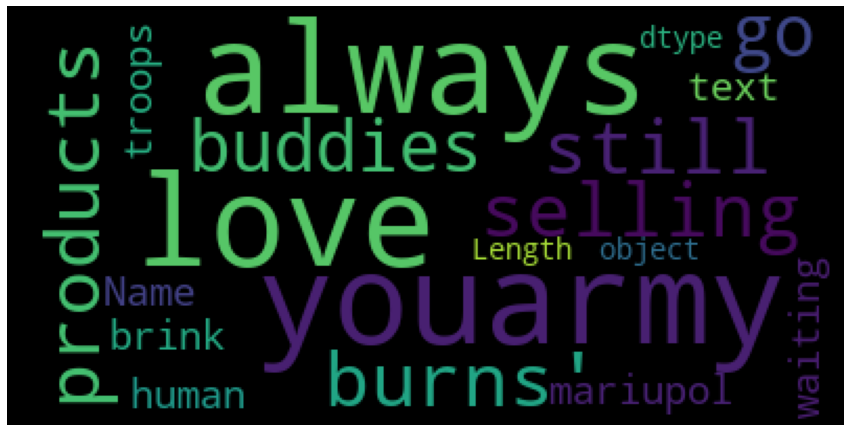

In [245]:
wordcloud = WordCloud(background_color='black',
                      max_words = 300,
                      max_font_size = 60,
                      random_state=42,
                     ).generate(str(sorted_tweets['text']))

print(wordcloud)
plt.imshow(wordcloud)
plt.axis('off')
plt.gcf().set_size_inches(15, 8)
plt.show()

In [246]:
stop = nltk.corpus.stopwords.words('english')

In [247]:
sorted_tweets['text'] = sorted_tweets['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [248]:
sorted_tweets

ï»¿        userid         username  \
207243   7239  2.554873e+09         bts_sone   
207254   7250  3.910485e+09        myyreneee   
207348   7344  1.369140e+18       5trawbemii   
207341   7337  1.414060e+18        rdcampos_   
207615   7611  2.511578e+09          ktyxxxb   
...       ...           ...              ...   
33535   33535  2.724200e+09  LilostartupLilo   
232994  32990  1.486370e+18          swepal2   
33536   33536  1.298710e+18       BeyFirudin   
232984  32980  1.202953e+09        lifieldgg   
363737  13730  1.097102e+09     polefrancois   

                                       acctdesc           location  following  \
207243                             SONE A.R.M.Y     In BTS's heart        608   
207254  You can do all things through Christ...    California, USA        231   
207348  × ÂâÂ× Âââ¢× ÂâÂ× Âââ...                NaN         83   
207341  BTS × ÂâÂ× ÂâÂ× ÂâÂ× Ââ...                NaN       1121   
207615  × Ââ¢Â¸ × Ââ¢Â¿× ÂÂâ× ÂÂÂ...                NaN        148   
...                                         ...                ...        ...   
33535   Selbst ernannter Goldfisch in Platon...             Berlin        989   
232994  Silence is Worse than Crimes against...  Stockholm, Sweden       2212   
33536   God created Turks, then paused, then...                NaN        331   
232984  #FightForUkraine #StandWithUkraine #...         Texas, USA       4849   
363737  Journalist |\nFiction Writer |\nScre...                NaN        131   

        followers  ...  tweetcreatedts retweetcount  \
207243         73  ...      05/04/2022       436782   
207254         64  ...      05/04/2022       436782   
207348         54  ...      05/04/2022       436781   
207341        565  ...      05/04/2022       436781   
207615        162  ...      05/04/2022       436778   
...           ...  ...             ...          ...   
33535         396  ...      01/04/2022            0   
232994        243  ...      05/04/2022            0   
33536         193  ...      01/04/2022            0   
232984       2334  ...      05/04/2022            0   
363737         63  ...      08/04/2022            0   

                                           text  \
207243               [] !we always love youarmy   
207254               [] !we always love youarmy   
207348               [] !we always love youarmy   
207341               [] !we always love youarmy   
207615               [] !we always love youarmy   
...                                         ...   
33535   still selling products ? unilever ?d...   
232994  handed putin note zelenskyy seeking ...   
33536   burns' buddies good . must stressful...   
232984  mariupol "on brink humanitarian cata...   
363737                          waiting troops.   

                                       hashtags  coordinates favorite_count  \
207243  [{'text': '×Ëâª×ÂË×ÂË×Â°Â©...          NaN              0   
207254  [{'text': '×Ëâª×ÂË×ÂË×Â°Â©...          NaN              0   
207348  [{'text': '×Ëâª×ÂË×ÂË×Â°Â©...          NaN              0   
207341  [{'text': '×Ëâª×ÂË×ÂË×Â°Â©...          NaN              0   
207615  [{'text': '×Ëâª×ÂË×ÂË×Â°Â©...          NaN              0   
...                                         ...          ...            ...   
33535   [{'text': 'Russia', 'indices': [39, ...          NaN              0   
232994  [{'text': 'RomanAbramovich', 'indice...          NaN              0   
33536   [{'text': 'Russian', 'indices': [19,...          NaN              0   
232984  [{'text': 'FightforUkraine', 'indice...          NaN              0   
363737  [{'text': 'NATO', 'indices': [42, 47]}]          NaN              1   

       extractedts  
207243     25:00.6  
207254     25:00.5  
207348     24:58.9  
207341     24:59.1  
207615     24:54.8  
...            ...  
33535      29:40.1  
232994     26:27.2  
33536      40:06.3  
232984     26:27.3  
363737

In [249]:
porter = PorterStemmer()

In [250]:
def stem_sentences(sentence):
    tokens = sentence.split()
    stemmed_tokens = [porter.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

sorted_tweets['text'] = sorted_tweets['text'].apply(stem_sentences)

In [251]:
print(porter.stem('channels'))

channel


In [252]:
sorted_tweets

ï»¿        userid         username  \
207243   7239  2.554873e+09         bts_sone   
207254   7250  3.910485e+09        myyreneee   
207348   7344  1.369140e+18       5trawbemii   
207341   7337  1.414060e+18        rdcampos_   
207615   7611  2.511578e+09          ktyxxxb   
...       ...           ...              ...   
33535   33535  2.724200e+09  LilostartupLilo   
232994  32990  1.486370e+18          swepal2   
33536   33536  1.298710e+18       BeyFirudin   
232984  32980  1.202953e+09        lifieldgg   
363737  13730  1.097102e+09     polefrancois   

                                       acctdesc           location  following  \
207243                             SONE A.R.M.Y     In BTS's heart        608   
207254  You can do all things through Christ...    California, USA        231   
207348  × ÂâÂ× Âââ¢× ÂâÂ× Âââ...                NaN         83   
207341  BTS × ÂâÂ× ÂâÂ× ÂâÂ× Ââ...                NaN       1121   
207615  × Ââ¢Â¸ × Ââ¢Â¿× ÂÂâ× ÂÂÂ...                NaN        148   
...                                         ...                ...        ...   
33535   Selbst ernannter Goldfisch in Platon...             Berlin        989   
232994  Silence is Worse than Crimes against...  Stockholm, Sweden       2212   
33536   God created Turks, then paused, then...                NaN        331   
232984  #FightForUkraine #StandWithUkraine #...         Texas, USA       4849   
363737  Journalist |\nFiction Writer |\nScre...                NaN        131   

        followers  ...  tweetcreatedts retweetcount  \
207243         73  ...      05/04/2022       436782   
207254         64  ...      05/04/2022       436782   
207348         54  ...      05/04/2022       436781   
207341        565  ...      05/04/2022       436781   
207615        162  ...      05/04/2022       436778   
...           ...  ...             ...          ...   
33535         396  ...      01/04/2022            0   
232994        243  ...      05/04/2022            0   
33536         193  ...      01/04/2022            0   
232984       2334  ...      05/04/2022            0   
363737         63  ...      08/04/2022            0   

                                           text  \
207243                [] !we alway love youarmi   
207254                [] !we alway love youarmi   
207348                [] !we alway love youarmi   
207341                [] !we alway love youarmi   
207615                [] !we alway love youarmi   
...                                         ...   
33535   still sell product ? unilev ?do prof...   
232994  hand putin note zelenskyy seek peac ...   
33536      burns' buddi good . must stress him.   
232984  mariupol "on brink humanitarian cata...   
363737                             wait troops.   

                                       hashtags  coordinates favorite_count  \
207243  [{'text': '×Ëâª×ÂË×ÂË×Â°Â©...          NaN              0   
207254  [{'text': '×Ëâª×ÂË×ÂË×Â°Â©...          NaN              0   
207348  [{'text': '×Ëâª×ÂË×ÂË×Â°Â©...          NaN              0   
207341  [{'text': '×Ëâª×ÂË×ÂË×Â°Â©...          NaN              0   
207615  [{'text': '×Ëâª×ÂË×ÂË×Â°Â©...          NaN              0   
...                                         ...          ...            ...   
33535   [{'text': 'Russia', 'indices': [39, ...          NaN              0   
232994  [{'text': 'RomanAbramovich', 'indice...          NaN              0   
33536   [{'text': 'Russian', 'indices': [19,...          NaN              0   
232984  [{'text': 'FightforUkraine', 'indice...          NaN              0   
363737  [{'text': 'NATO', 'indices': [42, 47]}]          NaN              1   

       extractedts  
207243     25:00.6  
207254     25:00.5  
207348     24:58.9  
207341     24:59.1  
207615     24:54.8  
...            ...  
33535      29:40.1  
232994     26:27.2  
33536      40:06.3  
232984     26:27.3  
363737

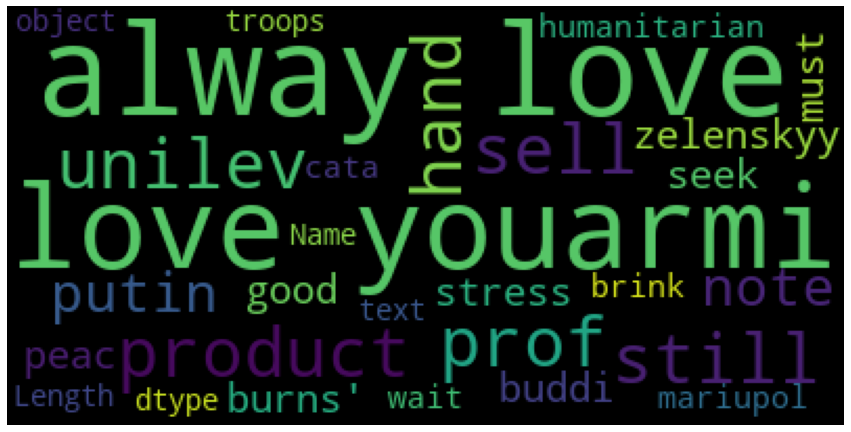

In [253]:
wordcloud = WordCloud(background_color='black',
                      max_words = 300,
                      max_font_size = 60,
                      random_state=42,
                     ).generate(str(sorted_tweets['text']))

print(wordcloud)
plt.imshow(wordcloud)
plt.axis('off')
plt.gcf().set_size_inches(15, 8)
plt.show()

Analyzing Top Words in the Word Cloud


In [254]:
# Combine all words into a list
tweets_long_string = sorted_tweets["text"].tolist()
tweets_list=[]
for item in tweets_long_string:
    item = item.split()
    for i in item:
        tweets_list.append(i)



In [255]:
# Use the Built-in Python Collections module to determine Word frequency
from collections import Counter
counts = Counter(tweets_list)
df = pd.DataFrame.from_dict(counts, orient='index').reset_index()
df.columns = ['Words', 'Count']
df.sort_values(by='Count', ascending=False, inplace=True)

In [256]:
df = df.iloc[2: , :]
df.head(10)

Words  Count
44    ukrainian  51582
173         war  37465
266      ukrain  36670
29        peopl  32344
357        kill  27229
331      russia  26303
200           :  24326
100        like  21831
1250       forc  21512
51          one  20507

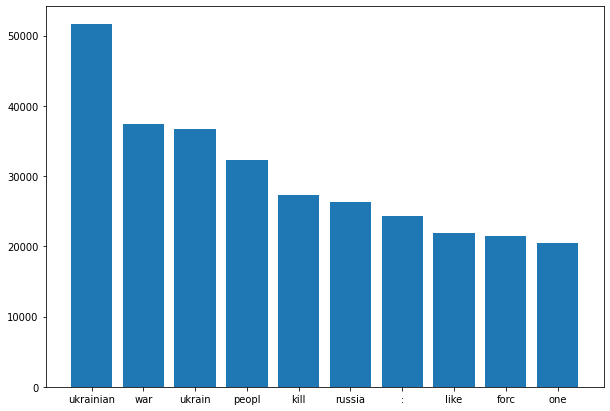

In [257]:
name = df['Words'].head(10)
price = df['Count'].head(10)
 
# Figure Size
fig = plt.figure(figsize =(10, 7))
 
# Horizontal Bar Plot
plt.bar(name[0:10], price[0:10])
 
# Show Plot
plt.show()

In [258]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [259]:
sorted_tweets["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in sorted_tweets["text"]]
sorted_tweets["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in sorted_tweets["text"]]
sorted_tweets["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in sorted_tweets["text"]]
sorted_tweets2 = sorted_tweets[["text", "Positive", "Negative", "Neutral"]]
print(sorted_tweets2)

                                           text  Positive  Negative  Neutral
207243                [] !we alway love youarmi     0.529     0.000    0.471
207254                [] !we alway love youarmi     0.529     0.000    0.471
207348                [] !we alway love youarmi     0.529     0.000    0.471
207341                [] !we alway love youarmi     0.529     0.000    0.471
207615                [] !we alway love youarmi     0.529     0.000    0.471
...                                         ...       ...       ...      ...
33535   still sell product ? unilev ?do prof...     0.311     0.155    0.534
232994  hand putin note zelenskyy seek peac ...     0.123     0.149    0.728
33536      burns' buddi good . must stress him.     0.299     0.289    0.412
232984  mariupol "on brink humanitarian cata...     0.000     0.423    0.577
363737                             wait troops.     0.000     0.000    1.000

[379713 rows x 4 columns]


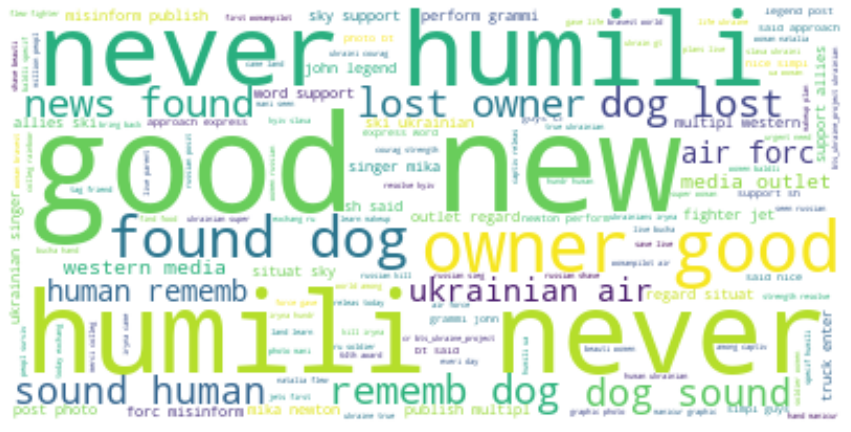

In [260]:
positive =' '.join([i for i in sorted_tweets2['text'][sorted_tweets2['Positive'] > sorted_tweets2["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

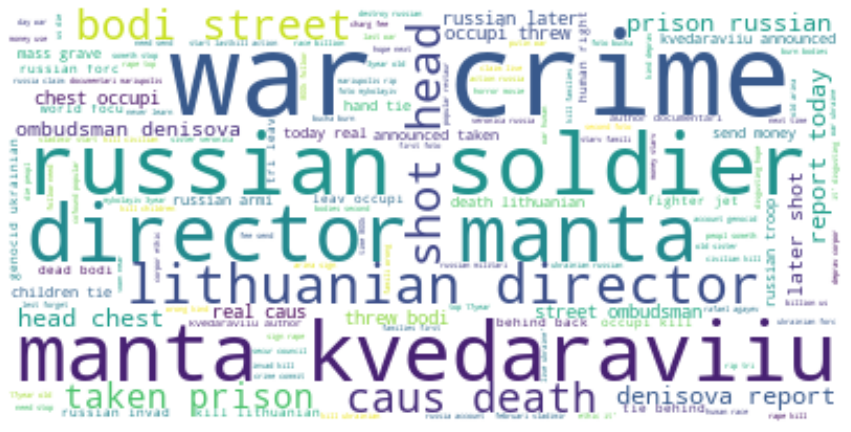

In [261]:
negative =' '.join([i for i in sorted_tweets2['text'][sorted_tweets2['Negative'] > sorted_tweets2["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# Subjective
def getSubjectivity(text):
  return TextBlob(str(text)).sentiment.subjectivity

#polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#new columns
sorted_tweets['Subjectivity'] = sorted_tweets['text'].apply(getSubjectivity)
sorted_tweets['Polarity'] = sorted_tweets['text'].apply(getPolarity)

#show new df 
print(sorted_tweets)

In [ ]:
sorted_tweets['text'] = sorted_tweets['text'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])

In [ ]:
from numpy.ma.core import negative
#create a fuction to compute the negative, neutral and postive analysis 
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
   return 'Neutral'
  else:
    return 'Positive'
sorted_tweets['Analysis'] = sorted_tweets['Polarity'].apply(getAnalysis)

In [ ]:
sorted_tweets[['text', 'Analysis', 'Polarity', 'Subjectivity' ]]

In [ ]:
# df_norm_col=(df_tweet['Polarity'].mean())/df_tweet['Subjectivity'].std()
sns.jointplot(sorted_tweets['Polarity'],sorted_tweets['Subjectivity'], cmap='kde')
plt.title('Sentimental analysis')
plt.show()

In [ ]:
ptweets = sorted_tweets[sorted_tweets['Analysis'] == 'Positive']
ptweets = ptweets['text']

round((ptweets.shape[0] / sorted_tweets.shape[0]) * 100,1)
29.0
ntweets = sorted_tweets[sorted_tweets['Analysis'] == 'Negative']
ntweets = ntweets['text']

round((ntweets.shape[0] / sorted_tweets.shape[0]) * 100,1)
21.6
neutweets = sorted_tweets[sorted_tweets['Analysis'] == 'Neutral']
neutweets = neutweets['text']

round((neutweets.shape[0] / sorted_tweets.shape[0]) * 100,1)
49.3
sorted_tweets['Analysis'].value_counts()
plt.title('Sentiment Analysis')
plt.xlabel('Sentiments')
plt.ylabel('Counts')
sorted_tweets['Analysis'].value_counts().plot(kind='bar')
plt.show()

In [ ]:
ptweets.head(10)

Polarity lies between [-1,1], -1 defines a negative sentiment and 1 defines a positive sentiment. Negation words reverse the polarity. TextBlob has semantic labels that help with fine-grained analysis. For example — emoticons, exclamation mark, emojis, etc. Subjectivity lies between [0,1]

Subjectivity quantifies the amount of personal opinion and factual information contained in the text. The higher subjectivity means that the text contains personal opinion rather than factual information.

In [ ]:
# Top retweeted tweet
pd.set_option('display.max_colwidth', None)
sorted_tweets.head()

In [ ]:
sorted_tweets['tweetcreatedts'] = pd.to_datetime(sorted_tweets['tweetcreatedts'],infer_datetime_format=True)


In [ ]:
sorted_tweets.groupby(sorted_tweets['tweetcreatedts'].dt.floor('1D'))['Subjectivity'].mean().dropna().plot(kind="line")


In [ ]:
sorted_tweets.groupby(sorted_tweets['tweetcreatedts'].dt.floor('1D'))["Positive"].mean().dropna().plot(kind="line")


In [ ]:
sorted_tweets.groupby(sorted_tweets['tweetcreatedts'].dt.floor('1D'))["Negative"].mean().dropna().plot(kind="line")


In [ ]:
sns.regplot(x="Polarity", y="followers", data=sorted_tweets,fit_reg= True)
plt.show()

from statsmodels.formula.api import ols
m = ols('Polarity ~ followers',sorted_tweets).fit()
print(m.summary())

